# Notebook 9 - Working with the GemPy Data Class

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functions to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from online services (WMS, WCS, WFS) or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, choosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems (=GIS) such as QGIS or ArcGIS and Google Earth. 

# Overview

This notebook will present the basic functions of the introduced `GemPy` Data Class and how it can be used to construct models with `GemPy`.

- [What is GemPy?](#gempy)
- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Creating a simple GemPy Model - GemPy Data Class](#creatingclass)
- [Methods of the GemPy Data Class](#methods)
- [Creating a GemPy Model](#modeling)

<a id='gempy'></a>
## What is GemPy?

`GemPy` is a Python-based, **open-source geomodeling library**. It is
capable of constructing complex **3D geological models** of folded
structures, fault networks and unconformities, based on the underlying
powerful **implicit representation** approach. `GemPy` was designed from the
ground up to support easy embedding in probabilistic frameworks for the
uncertainty analysis of subsurface structures.

Check out the documentation either on the main website (https://www.gempy.org/) or the specific docs site (http://docs.gempy.org/).

- GemPy Installation Help: https://docs.gempy.org/installation.html
- GemPy Tutorials: https://docs.gempy.org/tutorials/index.html
- GemPy Examples: https://docs.gempy.org/examples/index.html
- GemPy Repository: https://github.com/cgre-aachen/gempy
- GemPy Tutorial Video: https://youtu.be/n0btC5Zilyc


<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is under constant development and the latest available version can be downloaded at https://github.com/cgre-aachen/gemgis. A pip version can be found at https://pypi.org/project/gemgis/. A dedicated documentation page will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load online services as vector and raster data
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `postprocessing.py` - file containing functions to postprocess GemPy geo_model data
* `misc.py` - file containing functions for custom tasks 


If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. 

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class later in the tutorial, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.8 is the latest stable version that is supported by GemGIS***. A general introduction to working with rasters and Rasterio objects in GemGIS is provided in the next notebook.

The first step is loading `GemGIS` and the auxiliary libraries `geopandas` and `rasterio` apart from `NumPy` and `Matplotlib`. `GemGIS` will also load `GemPy` the background. If the installation of `GemPy`was not successful, `GemGIS` cannot be used. 

In [1]:
import sys
sys.path.append('../../gemgis')
import gemgis as gg
import gempy as gp
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
print(gg)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Thu Oct 29 19:28:36 2020 Mitteleuropäische Zeit

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.19.2
            scooby : 0.5.6
            owslib : 0.20.0
            pandas : 1.1.3
           shapely : 1.7.1
           pyvista : 0.26.1
          rasterio : 1.1.7
         geopandas : 0.8.1
          requests : 2.24.0
             scipy : 1.5.2
           skimage : 0.17.2
        matplotlib : 3.3.1
--------------------------------------------------------------------------------

<a id='createclass'></a>
# Creating a simple GemPy Model - GemPy Data Class

As GemGIS is providing functions to more easily create GemPy Models, a **GemPy Data Class** is being introduced. This class consists of attributes, such as the CRS of all input data, the interfaces, orientations, custom_sections, etc. It can be initiated empty or attributes can be passed during the initiation. During the course of the following notebooks, more and more attributes will be introduced. For more information about GemPy, visit https://docs.gempy.org/ or https://github.com/cgre-aachen/gempy.

## Initiating the class without attributes
Intiating the GemPy Data Class without attributes will set all of them to `None`.

In [3]:
geo_data = gg.GemPyData()

The following attributes are currently available:

In [4]:
vars(geo_data)

{'model_name': None,
 'crs': None,
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

## Initiating the class with attributes
The data class can also be initiated with attributes. Firstly, the raw interfaces, orientations and topographic contours will be loaded.

In [5]:
raw_i = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')
raw_o = gpd.read_file('../../gemgis/data/Test1/orientations1.shp')
raw_dem = gpd.read_file('../../gemgis/data/Test1/topo1.shp')

In [6]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:4326', 
                        extent=[0., 972., 0., 1069., 300., 800.], 
                        resolution=[50,50,50],
                        stack={"Strat_Series": ('Sand1', 'Ton')},
                        dem='../../gemgis/data/Test1/raster1.tif',
                        surface_colors= {'Ton':'#015482',
                                         'Sand1':'#9f0052',
                                         'basement':'#ffbe00'},
                       raw_i = raw_i,
                       raw_o = raw_o,
                       raw_dem = raw_dem)

In [7]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': [0.0, 972.0, 0.0, 1069.0, 300.0, 800.0],
 'resolution': [50, 50, 50],
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': {'Strat_Series': ('Sand1', 'Ton')},
 'dem': '../../gemgis/data/Test1/raster1.tif',
 'surface_colors': {'Ton': '#015482',
  'Sand1': '#9f0052',
  'basement': '#ffbe00'},
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i':      id formation                                           geometry
 0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....
 1  None       Ton  LINESTRING (0.188 495.787, 8.841 504.142, 41.0...
 2  None       Ton  LINESTRING (970.677 833.053, 959.372 800.023, ...,
 'raw_o':      id formation   dip  azimuth                 geometry
 0  None       Ton 30.50   180.00   POINT (96.471 451.564)
 1  None       Ton 30.50   180.00  POINT (172.761 661.877)
 2  None       Ton 30.50   180.00  POINT (383.074 957.758)
 3  None       Ton 3

## Inspecting the attributes of the GemPy Data Class
These attributes can now be inspected. 

In [8]:
geo_data.model_name

'Model1'

In [9]:
geo_data.crs

'EPSG:4326'

In [10]:
geo_data.extent

[0.0, 972.0, 0.0, 1069.0, 300.0, 800.0]

In [11]:
geo_data.resolution

[50, 50, 50]

In [12]:
geo_data.model_width

972.0

In [13]:
geo_data.model_length

1069.0

In [14]:
geo_data.model_depth

500.0

In [15]:
geo_data.model_area

1039068.0

In [16]:
geo_data.model_volume

519534000.0

In [17]:
geo_data.cell_width

19.44

In [18]:
geo_data.cell_length

21.38

In [19]:
geo_data.cell_depth

10.0

In [20]:
geo_data.stack

{'Strat_Series': ('Sand1', 'Ton')}

In [21]:
geo_data.dem

'../../gemgis/data/Test1/raster1.tif'

In [22]:
geo_data.surface_colors

{'Ton': '#015482', 'Sand1': '#9f0052', 'basement': '#ffbe00'}

In [23]:
geo_data.raw_i.head()

,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


In [24]:
geo_data.raw_o.head()

,id,formation,dip,azimuth,geometry
0,None,Ton,30.50,180.00,POINT (96.471 451.564)
1,None,Ton,30.50,180.00,POINT (172.761 661.877)
2,None,Ton,30.50,180.00,POINT (383.074 957.758)
3,None,Ton,30.50,180.00,POINT (592.356 722.702)
4,None,Ton,30.50,180.00,POINT (766.586 348.469)


In [25]:
geo_data.raw_dem

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."
5,None,600,"LINESTRING (114.513 1068.069, 151.627 930.438,..."
6,None,500,"LINESTRING (28.429 1067.554, 71.728 866.004, 1..."


<a id='methods'></a>
# Methods of the GemPy Data Class
## Create GemPy Section Dict from GeoDataFrame

A section dict can be created from a point or linestring GeoDataFrame.

In [26]:
section_gdf = gpd.read_file('../../gemgis/data/Test1/customsections1.shp')
section_gdf['Section'] = 'Section1'
section_gdf

,id,geometry,Section
0,None,POINT (695.467 3.226),Section1
1,None,POINT (669.284 1060.822),Section1


In [27]:
geo_data.to_section_dict(section_gdf, section_column ='Section')
geo_data.section_dict

{'Section1': ([695.4667461080886, 3.2262250771374283],
  [669.2840030245482, 1060.822026058724],
  [100, 80])}

## Create DataFrame ready to be used for GemPy
The loaded DataFrames can be converted into GemPy dataframes, that can directly be used for the modeling with GemPy. The resulting DataFrames are automatically stored in the attributes `geo_data.interfaces` and `geo_data.orientations`.

In [28]:
#Loading the dem
dem = rasterio.open(geo_data.dem)

geo_data.to_gempy_df(geo_data.raw_i, cat = 'interfaces', dem=dem)
geo_data.interfaces.head()

,index,X,Y,Z,formation
0,0,0.26,264.86,353.97,Sand1
1,1,10.59,276.73,359.04,Sand1
2,2,17.13,289.09,364.28,Sand1
3,3,19.15,293.31,364.99,Sand1
4,4,27.80,310.57,372.81,Sand1


In [29]:
geo_data.to_gempy_df(geo_data.raw_o, cat = 'orientations', dem=dem)
geo_data.orientations

,index,X,Y,Z,formation,dip,azimuth,polarity
0,0,96.47,451.56,440.59,Ton,30.50,180.00,1
1,1,172.76,661.88,556.38,Ton,30.50,180.00,1
2,2,383.07,957.76,729.02,Ton,30.50,180.00,1
3,3,592.36,722.70,601.55,Ton,30.50,180.00,1
4,4,766.59,348.47,378.63,Ton,30.50,180.00,1
5,5,843.91,167.02,282.61,Ton,30.50,180.00,1
6,6,941.85,428.88,423.45,Ton,30.50,180.00,1
7,7,22.14,299.55,368.05,Ton,30.50,180.00,1


## Setting the extent for a GemPy Model

The extent of a `GemPy` model can easily be set with `geo_data.set_extent(...)` and can then be used during the model initiation.

In [30]:
geo_data.set_extent(0., 972., 0., 1069., 300., 800.)
geo_data.extent

[0.0, 972.0, 0.0, 1069.0, 300.0, 800.0]

## Setting the resolution for a GemPy Model
The resolution of a `GemPy` model (in number of cells in X,Y,Z direction) can easily be set with `geo_data.set_resolution` and can then be used during the model initiation.

In [31]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

## Create surface color dict from QGIS Style File
A surface color dict can be created directly from a QGIS qml file and can be used to change the color of the stack once the surfaces have been assigned to a series. 

In [32]:
geo_data.to_surface_color_dict('../../gemgis/data/Test1/style1.qml')
geo_data.surface_colors.pop('Sand2')
geo_data.surface_colors

{'Sand1': '#b35a2a', 'Ton': '#525252'}

<a id='model'></a>
# Creating a GemPy Model
## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [33]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model1  2020-10-29 19:28

In [34]:
geo_data.set_extent(0,972,0,1069, 300, 800)
geo_data.extent

[0, 972, 0, 1069, 300, 800]

In [35]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model1  2020-10-29 19:28

In [36]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Sand1,Default series,1,#015482,1
1,Ton,Default series,2,#9f0052,2


In [37]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')
geo_model.surfaces.colors.change_colors(geo_data.surface_colors) 

In [38]:
geo_model.set_topography(source='gdal', filepath=geo_data.dem)


Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   9.72      ,   10.69      ,  305.        ],
       [   9.72      ,   10.69      ,  315.        ],
       [   9.72      ,   10.69      ,  325.        ],
       ...,
       [ 970.056     , 1059.28181818,  622.0892334 ],
       [ 970.056     , 1063.16909091,  622.06713867],
       [ 970.056     , 1067.05636364,  622.05786133]])

In [39]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1528.90
$C_o$           55655.83
drift equations      [3]


In [40]:
sol = gp.compute_model(geo_model)

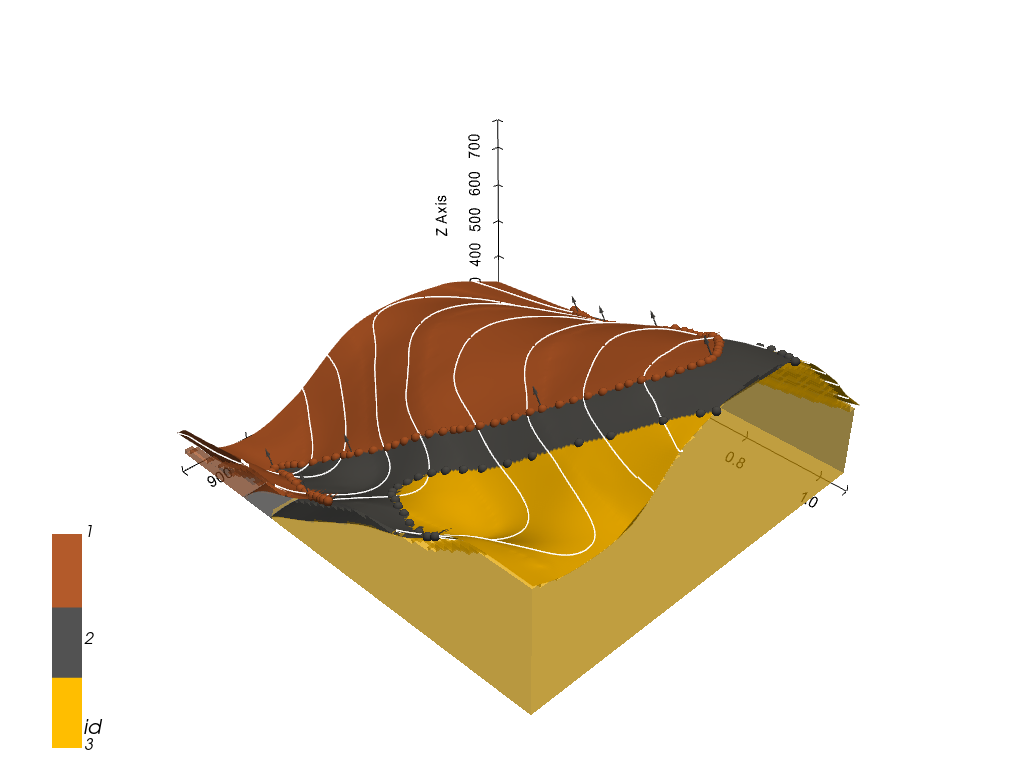

In [41]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True)